Εισαγωγή όλων των απαραίτητων βιβλιοθηκών. 

In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Αποθήκευση των δεδομένων για ομαδοποίηση , δηλαδή τα δεδομένα του αρχείου "new_data2.csv" που δημιουργήθηκαν με την εκτέλεση του αρχείου preprocess2.py , σε ένα dataframe. Την τιμή του id κάθε συμμετέχοντα την αποθηκεύουμε ξεχωριστά σε series και αφαιρούμε την στηλη των id από τα δεδομένα μας.

In [2]:
# Open the CSV (new_data2) file
data = pd.read_csv('../new_data2.csv')

# Extract participant IDs
participant_ids = data['id']

# Drop the 'id' column for clustering
X = data.drop('id', axis=1)

Με την συνάρτηση linkage() εκτελούμε hierarchical-agglomerative clustering πάνω στα δεδομένα μας , όπου επιλέγουμε κιόλας να γίνει με πλήρη σύνδεση. Στην συνέχεια εκτυπώνουμε και το δεντροδιάγραμμα που δημιουργήθηκε από αυτή την συσταδοποίηση.

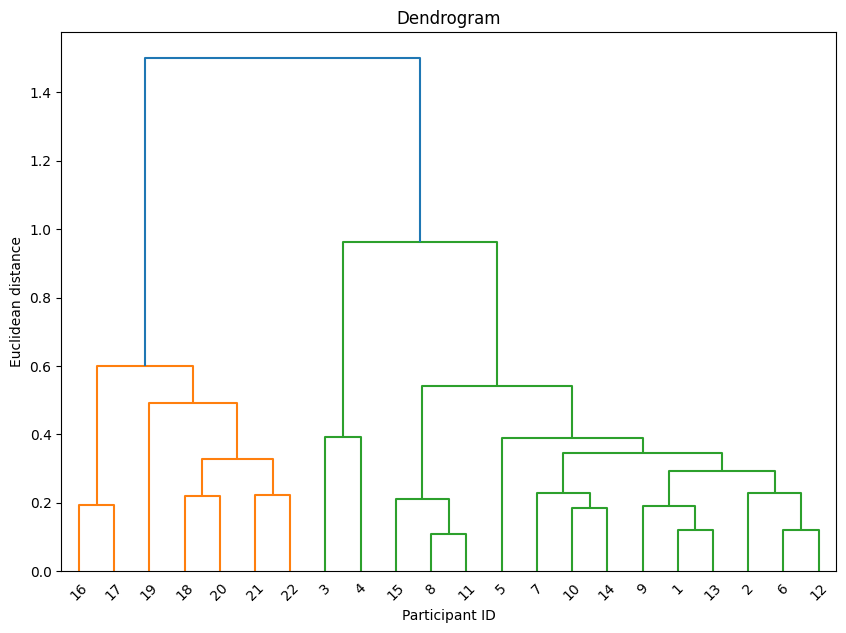

In [3]:
# Compute the linkage matrix
Z = linkage(X, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=participant_ids.values)
plt.title('Dendrogram')
plt.xlabel('Participant ID')
plt.ylabel('Euclidean distance')
plt.show()

Η συνάρτηση fcluster χρησιμοποιείται για την εξαγωγή επίπεδων ομάδων από την ιεραρχική συσταδοποίηση που έχει δημιουργηθεί από τη συνάρτηση linkage. Αυτό γίνεται ορίζοντας μια τιμή κατωφλίου (threshold) απόστασης, στην οποία κόβουμε το δενδροδιάγραμμα για να σχηματίσουμε ομάδες. Αποθηκεύουμε τις αναθέσεις ομαδών στο αρχικό μας dataframe και το εκτυπώνουμε για να δούμε πως χωρίστηκαν οι ομάδες. 

In [4]:
# Choose a threshold to cut the dendrogram and form clusters
max_d = 1
clusters = fcluster(Z, max_d, criterion='distance')

# Add the cluster assignments to the original dataframe
data['cluster'] = clusters

# Print the resulting clusters with participant IDs
print(data)


    back_x  back_y  back_z  thigh_x  thigh_y  thigh_z  id  cluster
0  -0.8021 -0.0001 -0.2749  -0.3702   0.1434   0.6164   1        2
1  -0.9204  0.0396 -0.3263  -0.3324   0.0510   0.6550   2        2
2  -0.9449 -0.0551  0.3130  -0.9584   0.0927   0.3210   3        2
3  -1.0197 -0.0020 -0.0143  -0.9062   0.0186   0.1466   4        2
4  -0.9153  0.0049 -0.1300  -0.3210   0.0129   0.8086   5        2
5  -0.9478 -0.0288 -0.2381  -0.5053   0.0203   0.5663   6        2
6  -0.9223 -0.0286 -0.0640  -0.3813   0.2075   0.6339   7        2
7  -0.8005  0.0470 -0.1365  -0.5435   0.0218   0.4399   8        2
8  -0.8098 -0.0860 -0.2228  -0.4896   0.1049   0.5143   9        2
9  -0.8777  0.0445 -0.0237  -0.4437   0.0169   0.5753  10        2
10 -0.8490  0.0580 -0.1129  -0.6292   0.0029   0.4050  11        2
11 -0.8848  0.0453 -0.2832  -0.5175   0.0140   0.6197  12        2
12 -0.8038  0.0189 -0.2287  -0.4515   0.0707   0.6307  13        2
13 -0.9293  0.0050 -0.0803  -0.4686   0.1499   0.4863  14     

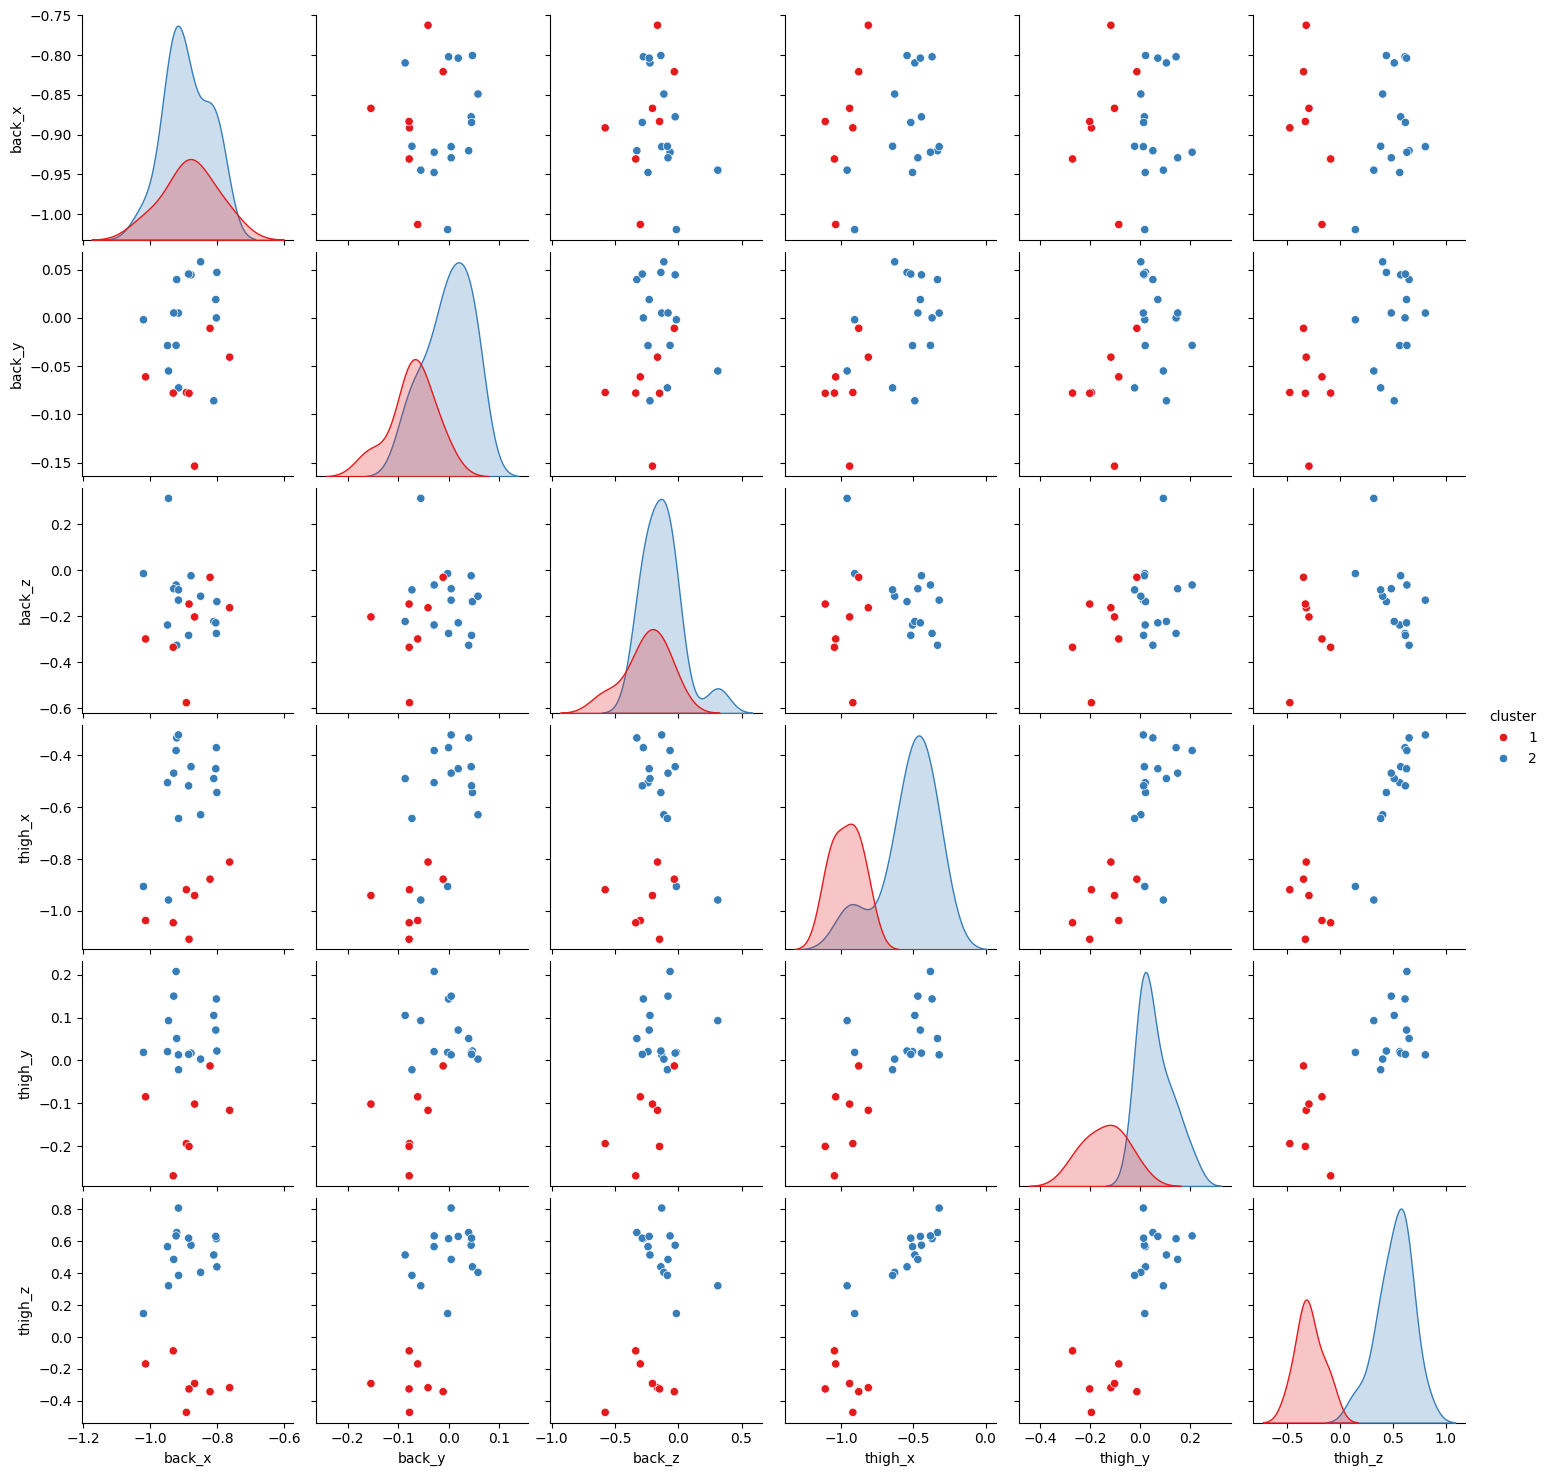

In [5]:
# Visualize the clusters
sns.pairplot(data.drop('id', axis=1), hue='cluster', palette='Set1')
plt.show()

In [6]:
# Calculate cluster centroids
centroids = []
for cluster_id in np.unique(clusters):
    cluster_points = X[clusters == cluster_id]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

# Calculate inertia
inertia = sum(np.linalg.norm(X[clusters == cluster_id] - centroids[cluster_id - 1])**2
              for cluster_id in np.unique(clusters))

print("Inertia (Dispersion):", inertia)

Inertia (Dispersion): 1.7991845893333334
